<a href="https://colab.research.google.com/github/prudhvi-netizen/DataScienceCourse/blob/main/introduction_to_data_science_assignment_2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
import seaborn as sns


In [ ]:
# Loading the dataset for the visualization of the iris dataset

In [ ]:
df = pd.read_csv('iris_dataset.csv')

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
#Loading the first two rows of the data from the top

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#Loading the last two rows of the data from the last

In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


#checking if there is any null values from the data

In [ ]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


#checking the columns that's in the dataset given

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
#gathering the info about the dataset and datatype of the columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#checking the datatypes of the columns in dataset

In [ ]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
#exploring the column that has object as datatype

In [ ]:
df.dtypes=='O'

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species          True
dtype: bool

In [ ]:
#checking if the species column is object or not

In [ ]:
df['species'].dtypes=='O'

True

In [ ]:
#checking for the column having object with for loop

In [ ]:
cat_col=[fea for fea in df.columns if df[fea].dtype == 'O']

In [ ]:
cat_col

['species']

In [ ]:
#checking for the column having numerical with for loop

In [ ]:
num_col=[fea for fea in df.columns if df[fea].dtype != 'O']

In [ ]:
num_col

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [ ]:
#checking if the data has null values and suming them together

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
#getting the measures of dispersion of the dataset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [ ]:
#correlation of the dataset

In [ ]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [ ]:
#covariance of the dataset

In [ ]:
df.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.039268,1.273682,0.516904
sepal_width,-0.039268,0.188004,-0.321713,-0.117981
petal_length,1.273682,-0.321713,3.113179,1.296387
petal_width,0.516904,-0.117981,1.296387,0.582414


In [ ]:
#checking the distribution of dataset either symmetric or asymmetric

In [ ]:
df.skew

C:\Users\Vineeth\AppData\Local\Temp\ipykernel_11748\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
sepal_height    0.343079
dtype: float64

In [ ]:
#below are some of the graphs and average of length

C:\Users\Vineeth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

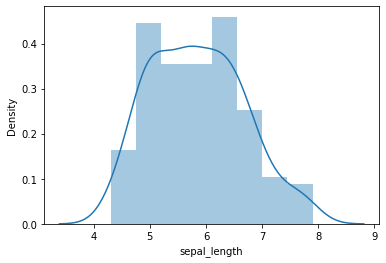

In [ ]:
sns.distplot(df['sepal_length'])

In [ ]:
df['sepal_height'] = (df['sepal_width']+df['petal_width'])/2

In [ ]:
df['sepal_height']

0      1.85
1      1.60
2      1.70
3      1.65
4      1.90
       ... 
145    2.65
146    2.20
147    2.50
148    2.85
149    2.40
Name: sepal_height, Length: 150, dtype: float64

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_height
0,5.1,3.5,1.4,0.2,setosa,1.85
1,4.9,3.0,1.4,0.2,setosa,1.60
2,4.7,3.2,1.3,0.2,setosa,1.70
3,4.6,3.1,1.5,0.2,setosa,1.65
4,5.0,3.6,1.4,0.2,setosa,1.90
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2.65
146,6.3,2.5,5.0,1.9,virginica,2.20
147,6.5,3.0,5.2,2.0,virginica,2.50
148,6.2,3.4,5.4,2.3,virginica,2.85


C:\Users\Vineeth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_height', ylabel='Density'>

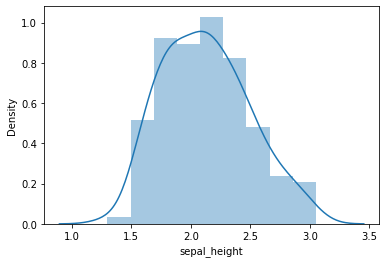

In [ ]:
sns.distplot(df['sepal_height'])

<AxesSubplot:>

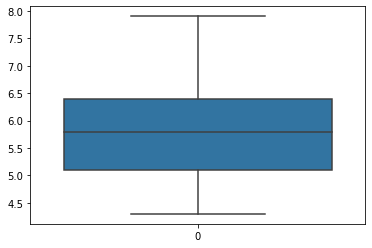

In [ ]:
sns.boxplot(data=df['sepal_length'])


C:\Users\Vineeth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length', ylabel='count'>

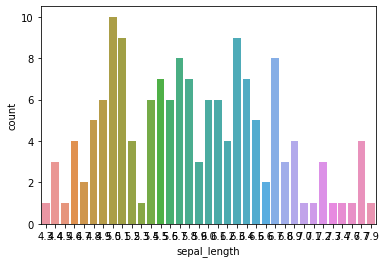

In [ ]:
sns.countplot(df['sepal_length'])

<AxesSubplot:>

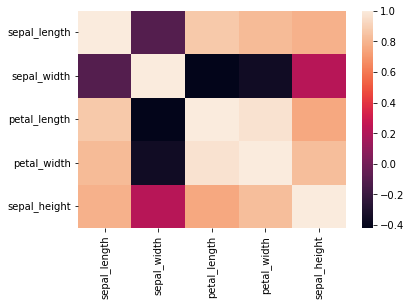

In [ ]:
sns.heatmap(df.corr())

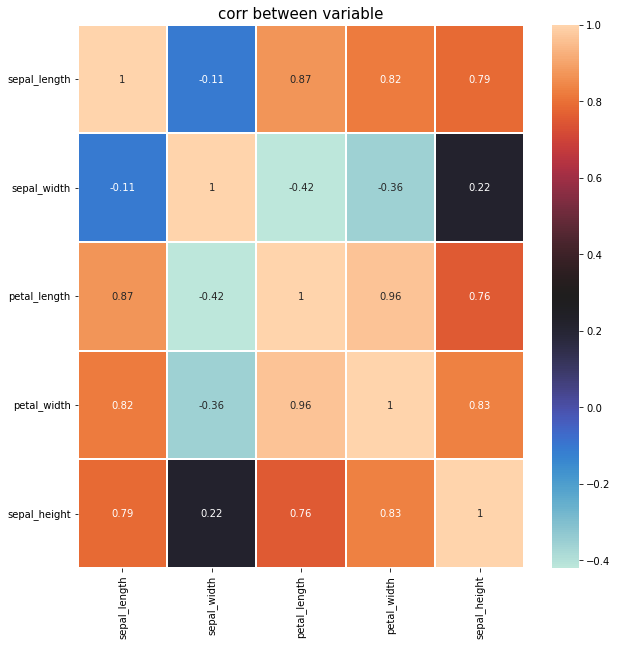

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("corr between variable",color='black',size=15)
plt.show()

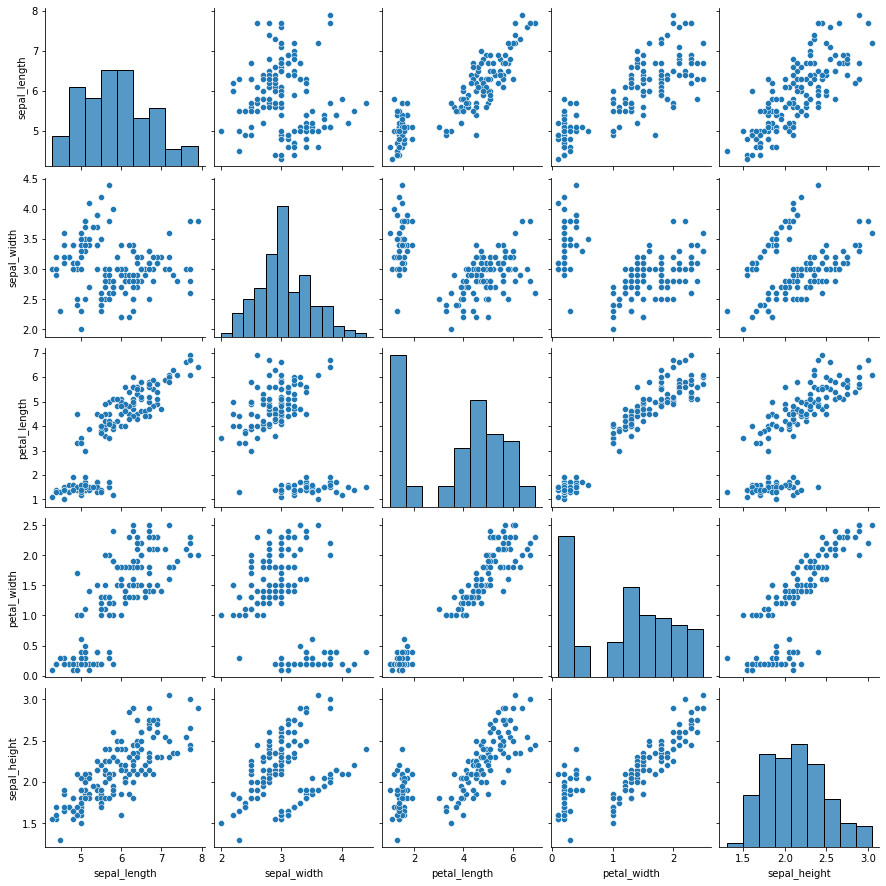

In [ ]:
sns.pairplot(df)